# 回帰分析

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 単回帰

## 訓練データ生成

In [0]:
n_sample = 100
var = .2

def linear_func(x):
    return 2 * x + 5

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

xs: (100,)
ys_true: (100,)
ys: (100,)


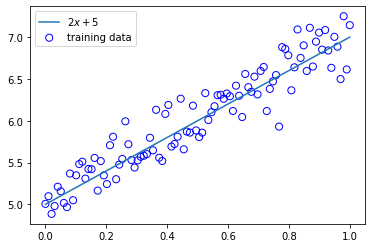

In [3]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

１次関数$y(x) = a x + b$における、$a$と$b$を求める。

訓練データ$X = [x_{1}, x_{2}, ..., x_{n}]^{\mathrm{T}}, \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]^{\mathrm{T}}$に対して、最小化する目的関数は$L = \sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right)^2$と書け、

$\frac{\partial L}{\partial a} = -2\sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right) x_{i} = 0$

$\frac{\partial L}{\partial b} = -2\sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right) = 0 \cdots (1)$

より、目的関数を最小にする$a, b$は以下のように求まる。

\begin{eqnarray}
\left( 
\begin{array}{cc}
\sum_{i=1}^{n} x_{i}^{2} & \sum_{i=1}^{n} x_{i} \\
\sum_{i=1}^{n} x_{i} & n
\end{array}
\right)
\left( 
\begin{array}{cc}
\hat{a} \\
\hat{b}  
\end{array}
\right)
&=&
\left( 
\begin{array}{cc}
\sum_{i=1}^{n} x_{i} y_{i} \\
\sum_{i=1}^{n} y_{i}  
\end{array}
\right) \\ 
\left( 
\begin{array}{cc}
\hat{a} \\
\hat{b}  
\end{array}
\right)
&=&
\frac{1}{n \sum_{i=1}^{n} x_{i}^{2} - (\sum_{i=1}^{n} x_{i})^{2}}
\left( 
\begin{array}{cc}
n & -\sum_{i=1}^{n} x_{i} \\
-\sum_{i=1}^{n} x_{i} & \sum_{i=1}^{n} x_{i}^{2}
\end{array}
\right)
\left( 
\begin{array}{cc}
\sum_{i=1}^{n} x_{i} y_{i} \\
\sum_{i=1}^{n} y_{i}  
\end{array}
\right) \\
&=&
\frac{1}{n \sum_{i=1}^{n} x_{i}^{2} - (\sum_{i=1}^{n} x_{i})^{2}}
\left( 
\begin{array}{cc}
n \sum_{i=1}^{n} x_{i} y_{i} - \sum_{i=1}^{n} x_{i} \sum_{i=1}^{n} y_{i}\\
\sum_{i=1}^{n} x_{i}^{2} \sum_{i=1}^{n} y_{i} -\sum_{i=1}^{n} x_{i} \sum_{i=1}^{n} x_{i} y_{i}
\end{array}
\right) \cdots (2)
\end{eqnarray}

(1), (2)から$\hat{a} = \text{Cov}[x, y] / \text{Var}[x], \hat{b} = \mu_{y} - \hat{a} \mu_{x}$で求める。

In [4]:
#numpy実装の回帰
def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0)
    a = cov[0, 1] / cov[0, 0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("cov: {}".format(cov))
print("coef: {}".format(a))
print("intercept: {}".format(b))

cov: [[0.08501684 0.16818206]
 [0.16818206 0.37338108]]
coef: 1.9782206771609632
intercept: 5.047078079857949


In [5]:
#skl実装の回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

print("coef_: {}".format(reg.coef_))
print("intercept_: {}".format(reg.intercept_))

coef_: [[1.97822068]]
intercept_: [5.04707808]


## 予測

入力に対する値を$y(x) = a x + b$で予測する

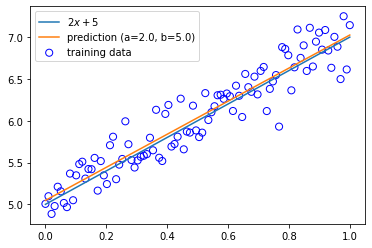

In [6]:
xs_new = np.linspace(0, 1, n_sample)
ys_pred = a * xs_new + b

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs_new, ys_true, label="$2 x + 5$")
plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

# 多項式回帰

## 訓練データ生成

In [0]:
n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()

xs: (10,)
ys_true: (10,)
ys: (10,)


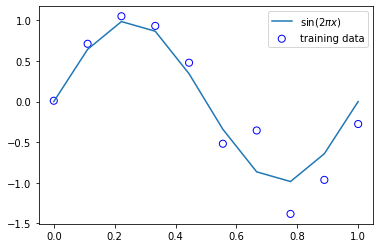

In [8]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x^{i} = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}$

ただし、$\boldsymbol{w}=[w_{0}, w_{1}, ..., w_{d}]^{\mathrm{T}}, \boldsymbol{\phi(x)} = [1, x, x^{2}, ..., x^{d}]^{\mathrm{T}}$である。

訓練データ$X, \boldsymbol{y}$に対しては
$\boldsymbol{y} = \Phi \boldsymbol{w}$と書ける。

ただし、$\Phi = [\boldsymbol{\phi}(x_{1}), \boldsymbol{\phi}(x_{2}),.., \boldsymbol{\phi}(x_{n})]^{\mathrm{T}}$である。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - \Phi \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 \Phi^{\mathrm{T}} (\boldsymbol{y} - \Phi \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( \Phi^{\mathrm{T}} \Phi \right)^{-1}  \Phi^{\mathrm{T}} \boldsymbol{y}$

In [0]:
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(100, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T

In [0]:
Phi = polynomial_features(xs)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

## 予測

入力を多項式特徴ベクトル$\boldsymbol{\phi(x)}$に変換し、$y = \hat{\boldsymbol{w}} \boldsymbol{\phi(x)}\  (\boldsymbol{y}(x) = \Phi \hat{\boldsymbol{w}})$で予測する。

In [0]:
Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

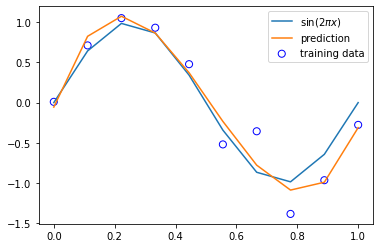

In [12]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()

# 重回帰分析

## 訓練データ生成 (3次元入力)

In [13]:
np.random.random((10, 3))

array([[0.8623466 , 0.80537842, 0.29231542],
       [0.16291666, 0.62703188, 0.45760527],
       [0.93698143, 0.14807608, 0.15269358],
       [0.28417726, 0.83248085, 0.94272327],
       [0.66892141, 0.18553458, 0.44696351],
       [0.20982107, 0.11134149, 0.4910458 ],
       [0.14627981, 0.51853433, 0.58264258],
       [0.66113576, 0.57510778, 0.8648786 ],
       [0.13570889, 0.83487374, 0.99815027],
       [0.40966383, 0.72548636, 0.48435871]])

In [0]:
n_sample = 100
var = .2

def mul_linear_func(x):
    global ww # 追加
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

In [0]:
x_dim = 3

X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x_{i} = \boldsymbol{w}^{\mathrm{T}}  \boldsymbol{x}$

ただし、陽には書かないが、$\boldsymbol{x}$には定数項のための$1$という要素があることを仮定する。

訓練データ$X, \boldsymbol{y}$に対しては$\boldsymbol{y} = X \boldsymbol{w}$と書ける。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - X \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 X^{\mathrm{T}} (\boldsymbol{y} - X \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( X^{\mathrm{T}} X \right)^{-1}  X^{\mathrm{T}} \boldsymbol{y}$

In [0]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_train = add_one(X)
# pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
# w = np.dot(pinv, y_train)

## 予測

入力に対する値を$y(x) = \hat{\boldsymbol{w}}^{\mathrm{T}}  \boldsymbol{x} \ (\boldsymbol{y} = X\hat{\boldsymbol{w}})$で予測する

## パラメータ推定結果

In [17]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, ww[i], w[i]))

w0_true:   1.0   w0_estimated: -0.056
w1_true:   0.5   w1_estimated: 1.1e+01
w2_true:   2.0   w2_estimated: -3.3e+01
w3_true:   1.0   w3_estimated: 2.1e+01
